In [1]:
import os
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#connect to the database, hosted via Docker
host = os.getenv('MYSQL_HOST')
port = os.getenv('MYSQL_PORT')
user = os.getenv('MYSQL_USER')
password = os.getenv('MYSQL_PASSWORD')

conn = pymysql.connect(
    host=host,
    port=int(port),
    user=user,
    passwd=password,
    db='strava',
    charset='utf8mb4')

In [92]:
pd.read_sql_query("""SHOW TABLES""", conn)

,Tables_in_strava
0,Activities
1,Athletes


In [89]:
pd.read_sql_query("""desc Athletes""", conn)

,Field,Type,Null,Key,Default,Extra
0,ID,bigint,NO,PRI,None,
1,FirstName,varchar(255),YES,,None,
2,LastName,varchar(255),YES,,None,
3,City,varchar(255),YES,,None,


In [98]:
pd.read_sql_query("""desc Activities""", conn)

,Field,Type,Null,Key,Default,Extra
0,ID,bigint,NO,PRI,None,
1,AthleteID,bigint,YES,MUL,None,
2,Name,varchar(255),YES,,None,
3,Distance,bigint,YES,,None,
4,MovingTime,int,YES,,None,
5,ElapsedTime,int,YES,,None,
6,TotalElevationGain,int,YES,,None,
7,ElevHigh,"decimal(10,3)",YES,,None,
8,ElevLow,"decimal(10,3)",YES,,None,
9,Type,varchar(255),YES,,None,


In [3]:
df = pd.read_sql_query(
    """
    SELECT 
      * 
    FROM 
      Activities
    """,
    conn)
df.tail(10)

,ID,AthleteID,Name,Distance,MovingTime,ElapsedTime,TotalElevationGain,ElevHigh,ElevLow,Type,StartDate
4181,10015609233,12770650,Afternoon Ride,12892,2088,2088,280,1863.2,1610.0,Ride,2023-10-10 21:57:10
4182,10016433696,31236472,"8 x 400m (@76s, /90s)",10469,3433,3681,42,1631.0,1615.0,Run,2023-10-10 23:30:38
4183,10022431972,12770650,In Motion - back to running!,9106,2411,2706,49,1609.6,1588.6,Run,2023-10-12 00:05:58
4184,10022500168,31236472,Evening Run,9096,2401,2699,39,1610.0,1587.0,Run,2023-10-12 00:06:01
4185,10033437876,12770650,Afternoon Run,4831,1311,1407,29,1638.8,1611.6,Run,2023-10-13 22:35:06
4186,10034197433,31236472,Afternoon Run,10476,2905,2905,27,1619.0,1578.0,Run,2023-10-12 23:40:53
4187,10034197440,31236472,Skunk and Mesa trail,13776,4665,4921,274,1894.0,1595.0,Run,2023-10-13 23:16:09
4188,10038762500,12770650,Eclipse + Walker,12794,4999,6297,531,2252.6,1965.6,Run,2023-10-14 16:15:33
4189,10039269849,31236472,Afternoon Trail Run,10156,3043,3043,39,1656.0,1613.0,Run,2023-10-14 20:00:29
4190,10045745816,31236472,Long run workout - mile on/off,24961,6442,7180,134,1638.0,1610.0,Run,2023-10-15 17:49:21


In [97]:
#query bike rides longer than 70km
pd.read_sql_query(
    "SELECT * FROM Activities WHERE Distance > 70000 AND Type = 'Ride'",
    conn
)

,ID,AthleteID,Name,Distance,MovingTime,ElapsedTime,TotalElevationGain,ElevHigh,ElevLow,Type,StartDate
0,1032327143,12770650,Made it up to Ward! What a beautiful day,76118,12473,14403,1352,2778.9,1611.0,Ride,2017-06-11 16:59:42
1,1084752142,12770650,Ironman 70.3 bike preview,80784,10012,10575,555,1703.2,1513.0,Ride,2017-07-15 13:24:59
2,1119043176,12770650,Boulder Ironman 70.3 - bike,86944,10102,10190,540,1731.7,1532.1,Ride,2017-08-05 17:26:21
3,1843978488,12770650,Enjoying that late summer weather in the mount...,85954,14857,17586,1577,2844.7,1606.9,Ride,2018-09-15 16:57:28
4,2507368116,12770650,"Olde Stage, Ward, Jamestown, Olde Stage --> po...",84247,16041,18641,1683,2827.5,1595.9,Ride,2019-07-05 18:16:57
5,3983266468,31236472,Brainard Lake!,90666,16361,18383,1812,3126.0,1631.2,Ride,2020-08-29 13:09:37
6,9733370666,31236472,Somewhat harder than I was expecting!,86427,18500,22367,1895,2651.0,1619.0,Ride,2023-08-27 14:41:05
7,9824613509,31236472,Buffalo Bike Classic Epic 100 miles,164294,27364,29267,2352,2847.0,1553.0,Ride,2023-09-10 13:01:03


In [22]:
#just query Chris's data, only select bike rides longer than 40km
pd.read_sql_query(
    """
    SELECT
      * 
    FROM 
      Athletes ath
      JOIN Activities act
      ON ath.ID = act.AthleteID
    WHERE
      ath.FirstName = 'Chris'
      AND act.Distance > 40000
      AND act.Type = 'Ride'  
    """,
    conn
)

,ID,FirstName,LastName,City,ID,AthleteID,Name,Distance,MovingTime,ElapsedTime,TotalElevationGain,ElevHigh,ElevLow,Type,StartDate
0,31236472,Chris,Wyburn-Powell,Boulder,3816116894,31236472,Bike to Gold Hill,44580,8696,9821,1078,2526.6,1622.2,Ride,2020-07-26 14:09:23
1,31236472,Chris,Wyburn-Powell,Boulder,3884360998,31236472,Mount Evans,46058,9516,14382,1040,4250.6,3260.4,Ride,2020-08-08 12:34:33
2,31236472,Chris,Wyburn-Powell,Boulder,3983266468,31236472,Brainard Lake!,90666,16361,18383,1812,3126.0,1631.2,Ride,2020-08-29 13:09:37
3,31236472,Chris,Wyburn-Powell,Boulder,9733370666,31236472,Somewhat harder than I was expecting!,86427,18500,22367,1895,2651.0,1619.0,Ride,2023-08-27 14:41:05
4,31236472,Chris,Wyburn-Powell,Boulder,9824613509,31236472,Buffalo Bike Classic Epic 100 miles,164294,27364,29267,2352,2847.0,1553.0,Ride,2023-09-10 13:01:03


In [96]:
#just query Chris's data, only select bike rides longer than 40km, displaying fewer columns
pd.read_sql_query(
    """
    SELECT
      Name,
      ROUND(Distance*0.000621371,2) as DistMiles,
      MovingTime/3600 as MovingHours,
      ROUND(ElevHigh*3.28084,1) as ElevHighFt,
      StartDate
    FROM 
      Athletes ath
      JOIN Activities act
      ON ath.ID = act.AthleteID
    WHERE
      ath.FirstName = 'Chris'
      AND act.Distance > 40000
      AND act.Type = 'Ride'  
    """,
    conn
)

,Name,DistMiles,MovingHours,ElevHighFt,StartDate
0,Bike to Gold Hill,27.70,2.4156,8289.4,2020-07-26 14:09:23
1,Mount Evans,28.62,2.6433,13945.5,2020-08-08 12:34:33
2,Brainard Lake!,56.34,4.5447,10255.9,2020-08-29 13:09:37
3,Somewhat harder than I was expecting!,53.70,5.1389,8697.5,2023-08-27 14:41:05
4,Buffalo Bike Classic Epic 100 miles,102.09,7.6011,9340.6,2023-09-10 13:01:03


In [95]:
#Select Sean and Chris's marathon length runs
pd.read_sql_query(
    """
    SELECT
      Name,
      ROUND(Distance*0.000621371,2) as DistMiles,
      MovingTime/3600 as MovingHours,
      ROUND(TotalElevationGain*3.28084,1) as ElevGainFt,
      StartDate
    FROM 
      Athletes ath
      JOIN Activities act
      ON ath.ID = act.AthleteID
    WHERE 
      Distance > 41500 
      AND Distance < 43500 
      AND Type = 'Run'
    ORDER BY 
      MovingHours
    """,
    conn
)

,Name,DistMiles,MovingHours,ElevGainFt,StartDate
0,California International Marathon (2:52:19 PR),26.34,2.8719,626.6,2022-12-04 15:00:24
1,Houston Marathon!,26.42,2.8961,252.6,2023-01-15 13:01:30
2,Berlin Marathon! 🇩🇪,26.52,3.0317,259.2,2023-09-24 07:16:05
3,Boston!,26.35,3.0319,987.5,2022-04-18 14:25:12
4,Colfax Marathon,26.25,3.0442,738.2,2021-10-16 12:45:06
5,LA Marathon - marathon and half marathon PR 😄,26.43,3.0781,859.6,2020-03-08 14:03:47
6,Toronto Waterfront Marathon,26.43,3.2650,498.7,2019-10-20 12:45:46
7,Phoenix Marathon - another marathon PR!,26.23,3.3525,305.1,2018-02-24 13:00:25
8,California International Marathon. New maratho...,26.33,3.4492,616.8,2017-12-03 14:59:58
9,Dublin Marathon!,26.37,3.6281,685.7,2017-10-29 09:10:51


In [110]:
pd.read_sql_query(
    f"""
    SELECT 
      Type,
      if(StartDate < '2021-01-01', 'before', 'after') as before_2021,
      COUNT(*) 
    FROM
      Athletes
      JOIN Activities
      ON Activities.AthleteID = Athletes.ID
    WHERE
      ElevHigh > 4000
    GROUP BY 
        Type, before_2021
    """,
    conn)

,Type,before_2021,COUNT(*)
0,Run,before,11
1,Ride,before,2
2,Hike,before,5
3,Run,after,3
4,Hike,after,4


In [129]:
#Select Chris's 5km fast runs, i.e. faster than 20 minutes. Then plot over time
Chris5km = pd.read_sql_query(
    f"""
    SELECT  
      Name,
      ROUND(Distance*0.001,3) as DistKm,
      SEC_TO_TIME(MovingTime) as HHMMSS,
      DATE(StartDate) as Date,
      StartDate,
      MovingTime
    FROM 
      Athletes ath
      JOIN Activities act
      ON ath.ID = act.AthleteID
    WHERE 
      ath.FirstName = 'Chris'
      AND Distance > 4900 
      AND Distance < 5100 
      AND MovingTime < 1200 
      AND Type = 'Run' 
    ORDER BY 
      HHMMSS 
    LIMIT 
      100
    """,
    conn)
Chris5km

,Name,DistKm,HHMMSS,Date,StartDate,MovingTime
0,"Gobbler 5K 17:36 (PR, 3rd)",5.051,00:17:36,2021-11-25,2021-11-25 12:39:09,1056
1,5K PB - Norwich parkrun #330,5.051,00:17:46,2016-12-10,2016-12-10 09:03:49,1066
2,Norwich parkrun #459,5.010,00:17:51,2019-05-18,2019-05-18 08:03:39,1071
3,Morning Run,5.026,00:18:00,2018-05-12,2018-05-12 16:05:53,1080
4,"Colder Boulder 5K (18:01, altitude PR)",4.996,00:18:00,2021-12-04,2021-12-04 14:05:02,1080
5,Afternoon Run,5.077,00:18:05,2018-03-15,2018-03-15 23:13:24,1085
6,Penrose parkrun,5.038,00:18:13,2022-05-21,2022-05-21 07:59:26,1093
7,Morning Run,5.000,00:18:16,2019-05-11,2019-05-11 08:08:48,1096
8,Canyon Rim Trail parkrun #4,4.991,00:18:19,2021-06-26,2021-06-26 15:00:27,1099
9,Morning Run,5.021,00:18:32,2019-02-16,2019-02-16 09:04:21,1112


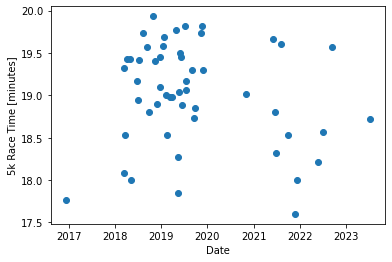

In [133]:
#plot parkrun hard effors or 5km races
plt.scatter(Chris5km['StartDate'], Chris5km['MovingTime']/60)
plt.ylabel('5k Race Time [minutes]')
plt.xlabel('Date');

In [143]:
#Look for instances of PR or PB in the name of the activities
ChrisPRs = pd.read_sql_query(
    """
    SELECT
      Name,
      ROUND(Distance*0.000621371,3) as DistMiles,
      SEC_TO_TIME(MovingTime) as HHMMSS,
      DATE(StartDate) as Date
    FROM 
      Athletes ath
      JOIN Activities act
      ON ath.ID = act.AthleteID
    WHERE 
      ath.FirstName = 'Chris'
      AND Name REGEXP '\\\\b(PB|PR)\\\\b'
    """, 
    conn)
ChrisPRs

,Name,DistMiles,HHMMSS,Date
0,Half Marathon Training Run (accidental PB),13.112,01:30:16,2019-04-01
1,Platte River Half Marathon (PB and age group w...,13.141,01:29:39,2019-04-14
2,Alternating 5:00/km and 5K PB pace,4.356,00:31:43,2019-05-16
3,5K PB - Norwich parkrun #330,3.139,00:17:46,2016-12-10
4,"10K PB, Reykjavik 10K",6.262,00:38:44,2017-08-19
5,"1 hour PB, Leamington C & AC Club Champs",9.319,01:00:00,2014-09-03
6,Fortitude 10K (37:45 PB),6.267,00:37:45,2021-09-06
7,SBC parkrun PB,3.121,00:18:32,2021-09-25
8,Jenks Half Marathon 1:20:47 PR,13.210,01:20:47,2021-11-06
9,"Gobbler 5K 17:36 (PR, 3rd)",3.139,00:17:36,2021-11-25


### Make a new column of total elevation gain in ft per mile

In [144]:
#now include the URL as a separate column and the average pace
extra_info = pd.read_sql_query(
    """
    SELECT 
      *,
      concat('https://www.strava.com/activities/',ID) as URL 
    FROM 
      Activities
    """, 
    conn
)

In [145]:
extra_info.tail(15)

,ID,AthleteID,Name,Distance,MovingTime,ElapsedTime,TotalElevationGain,ElevHigh,ElevLow,Type,StartDate,URL
4176,9997213121,31236472,Afternoon Run,7735,2406,2406,40,1637.0,1612.0,Run,2023-10-06 21:49:24,https://www.strava.com/activities/9997213121
4177,9997215837,31236472,Evening Run,9097,2651,3026,43,1616.0,1592.0,Run,2023-10-05 00:06:38,https://www.strava.com/activities/9997215837
4178,10002503463,12770650,Lunch Ride,17761,2704,2946,177,1747.2,1605.2,Ride,2023-10-08 17:31:22,https://www.strava.com/activities/10002503463
4179,10003705169,31236472,Afternoon Run,24345,8074,8447,232,1762.0,1607.0,Run,2023-10-08 22:12:44,https://www.strava.com/activities/10003705169
4180,10009082917,12770650,First run in 15 days (since Berlin),3723,1076,1104,13,1614.6,1602.0,Run,2023-10-09 22:13:35,https://www.strava.com/activities/10009082917
4181,10015609233,12770650,Afternoon Ride,12892,2088,2088,280,1863.2,1610.0,Ride,2023-10-10 21:57:10,https://www.strava.com/activities/10015609233
4182,10016433696,31236472,"8 x 400m (@76s, /90s)",10469,3433,3681,42,1631.0,1615.0,Run,2023-10-10 23:30:38,https://www.strava.com/activities/10016433696
4183,10022431972,12770650,In Motion - back to running!,9106,2411,2706,49,1609.6,1588.6,Run,2023-10-12 00:05:58,https://www.strava.com/activities/10022431972
4184,10022500168,31236472,Evening Run,9096,2401,2699,39,1610.0,1587.0,Run,2023-10-12 00:06:01,https://www.strava.com/activities/10022500168
4185,10033437876,12770650,Afternoon Run,4831,1311,1407,29,1638.8,1611.6,Run,2023-10-13 22:35:06,https://www.strava.com/activities/10033437876


In [119]:
#add in the total elevation gain in ft per mile via Pandas
extra_info['GainFtPerMile'] = extra_info['TotalElevationGain']*3.28084 / (extra_info['Distance']*0.621371/1000)


In [123]:
#print the steepest activities
extra_info.sort_values('GainFtPerMile', ascending=False).head(15)

,ID,AthleteID,Name,Distance,MovingTime,ElapsedTime,TotalElevationGain,ElevHigh,ElevLow,Type,StartDate,URL,GainFtPerMile
3824,8905958449,12770650,Table Mountain meander,4208,8242,11578,797,1038.4,352.2,Run,2023-04-17 07:35:34,https://www.strava.com/activities/8905958449,1000.038364
1165,2539518903,12770650,Morning hike,3910,7810,9493,701,753.6,17.4,Run,2019-07-17 08:11:27,https://www.strava.com/activities/2539518903,946.619249
495,1288845923,12770650,Ascutney Hike,5580,4879,5852,919,1033.2,255.6,Run,2017-11-24 14:52:12,https://www.strava.com/activities/1288845923,869.591695
631,1602904091,31236472,Morning Ride,9610,3315,4002,1389,3238.0,2826.8,Ride,2018-03-23 15:08:57,https://www.strava.com/activities/1602904091,763.155307
1183,2567265833,12770650,Slovenian hike #1,3860,6000,11488,520,2095.6,1611.8,Hike,2019-07-27 06:45:25,https://www.strava.com/activities/2567265833,711.295580
686,1602904369,31236472,Morning Ride,50874,12268,14665,6780,3372.4,2953.0,AlpineSki,2018-03-09 15:56:47,https://www.strava.com/activities/1602904369,703.668126
1153,2524582513,31236472,Morning Ride,8873,12210,22799,1140,1146.8,-124.6,Ride,2019-06-21 09:53:13,https://www.strava.com/activities/2524582513,678.372823
1217,2624033461,31236472,Hike up Mount Kriz,8466,11460,15755,1060,1827.4,784.8,Hike,2019-07-30 06:39:47,https://www.strava.com/activities/2624033461,661.091650
79,588165321,12770650,Afternoon Run,5135,4110,4732,641,2482.0,1832.6,Run,2016-05-25 23:34:59,https://www.strava.com/activities/588165321,659.100517
1186,2575775692,12770650,Morning Run,8586,13957,14787,1057,1990.4,948.8,Run,2019-07-30 06:55:34,https://www.strava.com/activities/2575775692,650.007210


In [124]:
#print the highest elevation activities
extra_info.sort_values('ElevHigh', ascending=False).head(15)

,ID,AthleteID,Name,Distance,MovingTime,ElapsedTime,TotalElevationGain,ElevHigh,ElevLow,Type,StartDate,URL,GainFtPerMile
1327,2839396901,12770650,Quandary Peak! My first winter fourteener,11312,13102,20929,1232,4396.8,3356.8,Hike,2019-11-03 13:56:02,https://www.strava.com/activities/2839396901,575.049701
392,1064193527,12770650,Mount Elbert!,14644,11555,13471,1362,4396.3,3067.0,Run,2017-07-02 11:05:37,https://www.strava.com/activities/1064193527,491.079108
1834,3850287602,31236472,Mount Massive,13773,13904,16242,1255,4394.4,3139.5,Hike,2020-08-01 13:43:03,https://www.strava.com/activities/3850287602,481.115390
1326,2839310261,31236472,Quandry Peak,11108,14039,21101,1167,4377.8,3315.2,Hike,2019-11-03 13:53:39,https://www.strava.com/activities/2839310261,554.713909
4127,9777232831,31236472,Greys and Torreys!,21476,18242,25076,1439,4351.0,2996.0,Hike,2023-09-03 10:28:00,https://www.strava.com/activities/9777232831,353.786673
1128,2496268411,12770650,Canada Day on Mt Evans with Mike Brown,810,684,1526,44,4350.6,4306.8,Run,2019-07-01 18:05:36,https://www.strava.com/activities/2496268411,286.814913
382,1052194222,12770650,Grays and Torreys - my first 14ers!,18238,14657,18916,1620,4349.7,2985.6,Run,2017-06-24 11:51:41,https://www.strava.com/activities/1052194222,468.998954
1885,3942796311,31236472,Decalibron!,11836,11806,14902,1041,4338.4,3662.3,Hike,2020-08-20 13:32:00,https://www.strava.com/activities/3942796311,464.386776
1882,3942681633,12770650,Decalibron,12066,14795,14904,1094,4338.4,3662.3,Run,2020-08-20 13:31:57,https://www.strava.com/activities/3942681633,478.727165
4085,9596284304,12770650,Mount Yale!,15265,15306,20839,1342,4323.6,3032.0,Hike,2023-08-06 13:30:35,https://www.strava.com/activities/9596284304,464.183585


### Now save a desired output to CSV

In [125]:
extra_info.sort_values('ElevHigh', ascending=False).head(15).to_csv('~/tmp/Strava_15_highest_activities.csv')